In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import lmdiag
import wooldridge
from statsmodels.stats.api import het_breuschpagan, het_white
from seaborn import residplot
from statsmodels.stats.outliers_influence import reset_ramsey

In [2]:
gpa3 = wooldridge.data('gpa3').query('spring == 1')  # 春学期だけを抽出
wooldridge.data('gpa3', description=True)

name of dataset: gpa3
no of variables: 23
no of observations: 732

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| term     | fall = 1, spring = 2         |
| sat      | SAT score                    |
| tothrs   | total hours prior to term    |
| cumgpa   | cumulative GPA               |
| season   | =1 if in season              |
| frstsem  | =1 if student's 1st semester |
| crsgpa   | weighted course GPA          |
| verbmath | verbal SAT to math SAT ratio |
| trmgpa   | term GPA                     |
| hssize   | size h.s. grad. class        |
| hsrank   | rank in h.s. class           |
| id       | student identifier           |
| spring   | =1 if spring term            |
| female   | =1 if female                 |
| black    | =1 if black                  |
| white    | =1 if white                  |
| ctrmgpa  | change in trmgpa             |
| ctothrs  | change in total hours        |
| ccrsgpa

In [3]:
wooldridge.data('gpa2', description=True)

name of dataset: gpa2
no of variables: 12
no of observations: 4137

+----------+----------------------------------+
| variable | label                            |
+----------+----------------------------------+
| sat      | combined SAT score               |
| tothrs   | total hours through fall semest  |
| colgpa   | GPA after fall semester          |
| athlete  | =1 if athlete                    |
| verbmath | verbal/math SAT score            |
| hsize    | size grad. class, 100s           |
| hsrank   | rank in grad. class              |
| hsperc   | high school percentile, from top |
| female   | =1 if female                     |
| white    | =1 if white                      |
| black    | =1 if black                      |
| hsizesq  | hsize^2                          |
+----------+----------------------------------+

For confidentiality reasons, I cannot provide the source of these
data. I can say that  they come from a midsize research university
that also supports men’s and w

In [4]:
form_ols = 'cumgpa ~ sat + hsperc + tothrs + female + black + white'

mod_ols = ols(form_ols, data=gpa3)
res_ols = mod_ols.fit()

print(res_ols.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.230      6.397      0.000       1.018       1.922
sat            0.0011      0.000      6.389      0.000       0.001       0.001
hsperc        -0.0086      0.001     -6.906      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.426      0.001       0.001       0.004
female         0.3034      0.059      5.141      0.000       0.187       0.420
black         -0.1283      0.147     -0.870      0.385      -0.418       0.162
white         -0.0587      0.141     -0.416      0.677      -0.336       0.219


In [5]:
res_robust = res_ols.get_robustcov_results(cov_type='HC3', use_t=True)

print(res_robust.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.229      6.409      0.000       1.019       1.921
sat            0.0011      0.000      5.840      0.000       0.001       0.002
hsperc        -0.0086      0.001     -5.934      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.342      0.001       0.001       0.004
female         0.3034      0.060      5.054      0.000       0.185       0.422
black         -0.1283      0.128     -1.001      0.318      -0.380       0.124
white         -0.0587      0.120     -0.488      0.626      -0.296       0.178


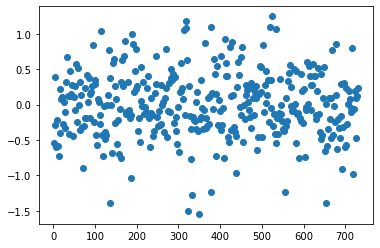

In [6]:
res_ols.resid.plot(style='o')
pass

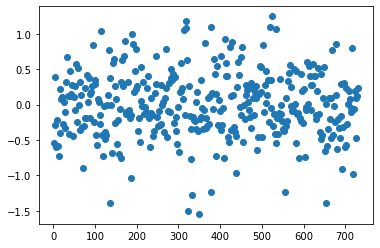

In [7]:
plt.plot(res_ols.resid, 'o')
pass

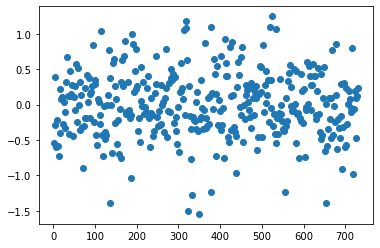

In [8]:
plt.scatter(res_ols.resid.index, res_ols.resid)
pass

In [9]:
res_HC3 = ols(form_ols, data=gpa3).fit(cov_type='HC3', use_t=True)

print(res_HC3.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4701      0.229      6.409      0.000       1.019       1.921
sat            0.0011      0.000      5.840      0.000       0.001       0.002
hsperc        -0.0086      0.001     -5.934      0.000      -0.011      -0.006
tothrs         0.0025      0.001      3.342      0.001       0.001       0.004
female         0.3034      0.060      5.054      0.000       0.185       0.422
black         -0.1283      0.128     -1.001      0.318      -0.380       0.124
white         -0.0587      0.120     -0.488      0.626      -0.296       0.178


In [10]:
hypotheses = 'black = white = 0'

In [11]:
f_test_ols = res_ols.f_test(hypotheses)

f_test_ols.summary()

'<F test: F=array([[0.6796042]]), p=0.5074683622584049, df_denom=359, df_num=2>'

In [12]:
f_test_HC3 = res_HC3.f_test(hypotheses)

f_test_HC3.summary()

'<F test: F=array([[0.6724693]]), p=0.5110883633440992, df_denom=359, df_num=2>'

In [13]:
hprice1 = wooldridge.data('hprice1')
wooldridge.data('hprice1', description=True)

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.


In [14]:
form_h = 'price ~ lotsize + sqrft + bdrms'

res_h = ols(form_h, data=hprice1).fit()

print(res_h.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475     -0.739      0.462     -80.385      36.844
lotsize        0.0021      0.001      3.220      0.002       0.001       0.003
sqrft          0.1228      0.013      9.275      0.000       0.096       0.149
bdrms         13.8525      9.010      1.537      0.128      -4.065      31.770


In [15]:
het_breuschpagan(res_h.resid, res_h.model.exog)

(14.092385504350222,
 0.00278205955568911,
 5.338919363241413,
 0.002047744420936089)

In [16]:
form_h_log = 'np.log(price) ~ np.log(lotsize) + np.log(sqrft) + bdrms'

res_h_log = ols(form_h_log, data=hprice1).fit()

print(res_h_log.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.2970      0.651     -1.992      0.050      -2.592      -0.002
np.log(lotsize)     0.1680      0.038      4.388      0.000       0.092       0.244
np.log(sqrft)       0.7002      0.093      7.540      0.000       0.516       0.885
bdrms               0.0370      0.028      1.342      0.183      -0.018       0.092


In [17]:
het_breuschpagan(res_h_log.resid, res_h_log.model.exog)

(4.223245741805276,
 0.23834482631492962,
 1.4114999061208053,
 0.2451456613048952)

In [18]:
het_white(res_h.resid, res_h.model.exog)

(33.731657711098364,
 9.952939773734298e-05,
 5.38695344589459,
 1.012938832390086e-05)

In [19]:
het_white(res_h_log.resid, res_h_log.model.exog)

(9.549452426207196,
 0.38817399191076646,
 1.0549565756603647,
 0.4053123705653226)

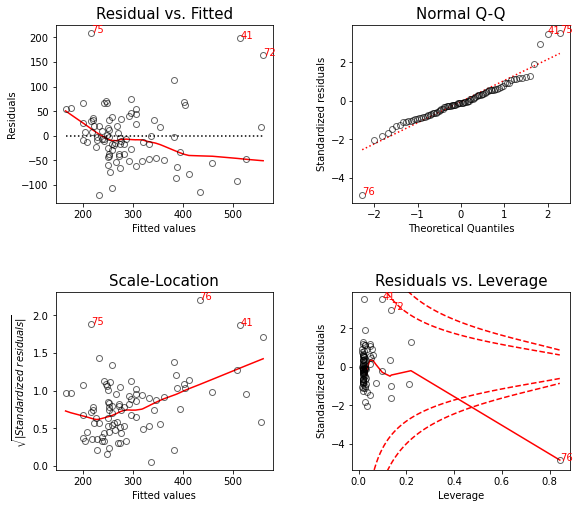

In [20]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_h)
pass

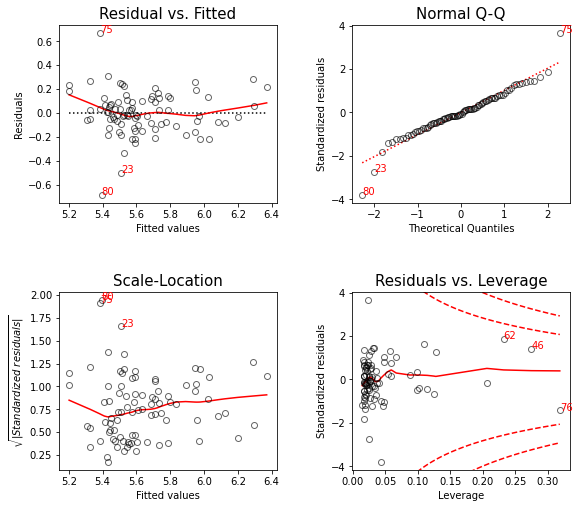

In [21]:
plt.figure(figsize=(8,7))
lmdiag.plot(res_h_log)
pass

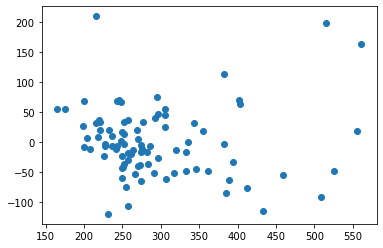

In [22]:
plt.scatter(res_h.fittedvalues, res_h.resid)
pass

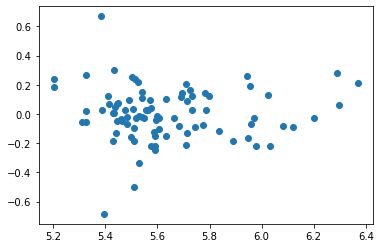

In [23]:
plt.scatter(res_h_log.fittedvalues, res_h_log.resid)
pass

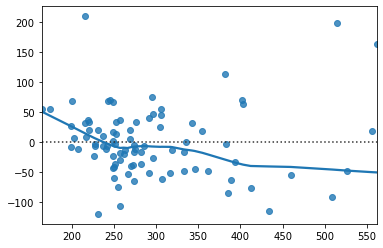

In [24]:
residplot(res_h.fittedvalues, res_h.resid, lowess=True)
pass

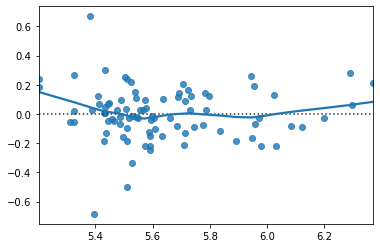

In [25]:
residplot(res_h_log.fittedvalues, res_h_log.resid, lowess=True)
pass

In [26]:
reset_ramsey(res_h,degree=3).summary()

'<F test: F=array([[4.66820553]]), p=0.012021711442883259, df_denom=82, df_num=2>'

In [27]:
reset_ramsey(res_h_log,degree=3)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[2.56504079]]), p=0.08307588975022608, df_denom=82, df_num=2>